In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [37]:
train_df = pd.read_csv("./../data/train.csv")
test_df = pd.read_csv("./../data/test.csv")
train_df.head, test_df.head

(<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0        1          60       RL         65.0     8450   Pave   NaN      Reg   
 1        2          20       RL         80.0     9600   Pave   NaN      Reg   
 2        3          60       RL         68.0    11250   Pave   NaN      IR1   
 3        4          70       RL         60.0     9550   Pave   NaN      IR1   
 4        5          60       RL         84.0    14260   Pave   NaN      IR1   
 ...    ...         ...      ...          ...      ...    ...   ...      ...   
 1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
 1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
 1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
 1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
 1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   
 
      La

In [38]:
train_df.set_index('Id', inplace=True)
test_df.set_index('Id', inplace=True)
len_train_df = len(train_df)
len_test_df = len(test_df)

In [39]:
corrmat = train_df.corr()
top_corr = corrmat.index[abs(corrmat["SalePrice"])>=0.3]
top_corr

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

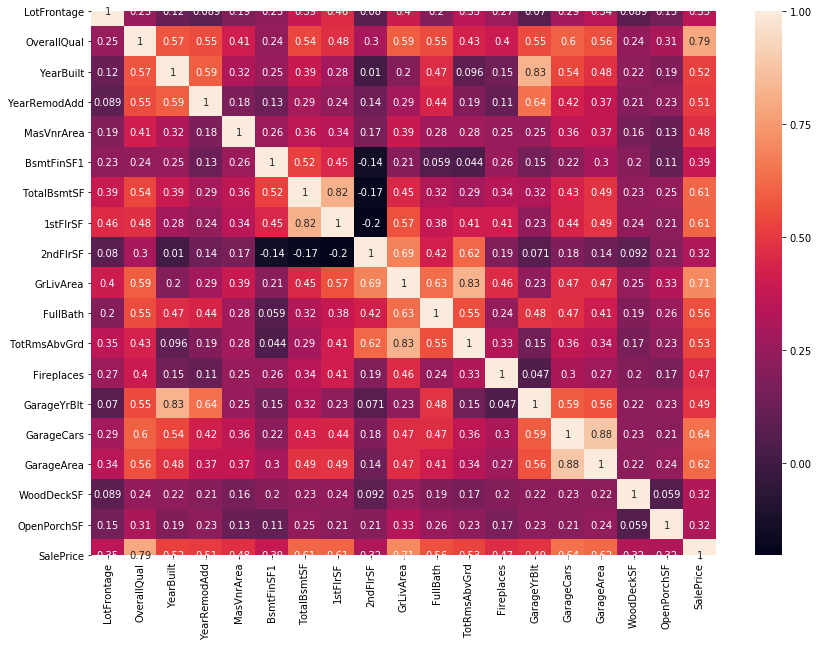

In [40]:
plt.figure(figsize=(14, 10))
map = sbn.heatmap(train_df[top_corr].corr(), annot=True)

In [41]:
train_y_label = train_df["SalePrice"]
train_df.drop(["SalePrice"], axis = 1, inplace = True)

house_df = pd.concat((train_df, test_df), axis=0)
house_df_index = house_df.index

In [42]:
check_null = house_df.isna().sum() / len(house_df)
remove_col = check_null[check_null >= 0.5].keys()
house_df = house_df.drop(remove_col, axis=1)

In [43]:
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [44]:
house_obj_df = house_df.select_dtypes(include='object')
house_num_df = house_df.select_dtypes(exclude='object')

In [45]:
house_dummy_df = pd.get_dummies(house_obj_df, drop_first=True)
house_dummy_df.index = house_df_index
house_dummy_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [46]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='mean')
imputer.fit(house_num_df)
house_num_df_ = imputer.transform(house_num_df)

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [47]:
house_num_df = pd.DataFrame(house_num_df_, columns=house_num_df.columns, index=house_df_index)
house_num_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
2,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
3,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
4,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
5,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


In [48]:
house_df = pd.merge(house_dummy_df, house_num_df, left_index=True, right_index=True)
house_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
2,0,0,1,0,1,0,0,1,0,0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
3,0,0,1,0,1,0,0,0,0,0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
4,0,0,1,0,1,0,0,0,0,0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
5,0,0,1,0,1,0,0,0,0,0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


In [49]:
train_df = house_df[:len_train_df]
test_df = house_df[len_train_df:]

train_df['SalePrice'] = train_y_label

print('train set length: ',len(train_df))
print('test set length: ',len(test_df))

train set length:  1460
test set length:  1459


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [50]:
from sklearn.model_selection import train_test_split

X_train = train_df.drop(['SalePrice'], axis=1)
y_train = train_df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

X_test = test_df
test_id_idx = test_df.index

In [51]:
print('X_train : ',len(X_train))
print('X_val : ',len(X_val))
print('X_test :',len(X_test))

X_train :  1168
X_val :  292
X_test : 1459
